<a href="https://colab.research.google.com/github/hn-iiitd/ML_Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [89]:
# !wget https://raw.githubusercontent.com/hn-iiitd/ML_Project/refs/heads/main/online_gaming_behavior_dataset_updated.csv?token=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ
# !mv ./online_gaming_behavior_dataset_updated.csv\?token\=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ online_gaming_behavior_dataset_updated.csv
# ! curl https://drive.google.com/file/d/1YEfzyYEqyvmkdOowMGYFMjW1h5USuoKq/view?usp=sharing
!wget https://raw.githubusercontent.com/hn-iiitd/ML_Project/main/online_gaming_behavior_dataset_updated.csv
df = pd.read_csv('online_gaming_behavior_dataset_updated.csv')
df.head()

--2024-11-28 20:36:40--  https://raw.githubusercontent.com/hn-iiitd/ML_Project/main/online_gaming_behavior_dataset_updated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3134220 (3.0M) [text/plain]
Saving to: ‘online_gaming_behavior_dataset_updated.csv.3’

online_gaming_behav 100%[===================>]   2.99M  --.-KB/s    in 0.05s   

2024-11-28 20:36:41 (66.2 MB/s) - ‘online_gaming_behavior_dataset_updated.csv.3’ saved [3134220/3134220]



,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,73408
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,50308
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,83895
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,50722
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,63269


In [90]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,73408
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,50308
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,83895
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,50722
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,63269


In [91]:
label_encoder = LabelEncoder()
ToEncode = ['Gender','Location','GameGenre','GameDifficulty','EngagementLevel']
for col in ToEncode:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['PlayerID', 'InGamePurchases'])
Y = df['InGamePurchases']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 , stratify=Y)



In [92]:
#DATA SAMPLING
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN



smote = SMOTE(random_state=42)
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)  #TOMEK LINKS


smote_tomek = SMOTETomek(random_state=42)
X_resampled_SMOTE_TOMEK, y_resampled_SMOTE_TOMEK = smote_tomek.fit_resample(X_train, y_train)


smote_ENN = SMOTEENN(random_state=42)
X_resampled_SMOTE_ENN, y_resampled_SMOTE_ENN = smote_ENN.fit_resample(X_train, y_train)


ADASYN_model = ADASYN(random_state=42)
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN_model.fit_resample(X_train, y_train)



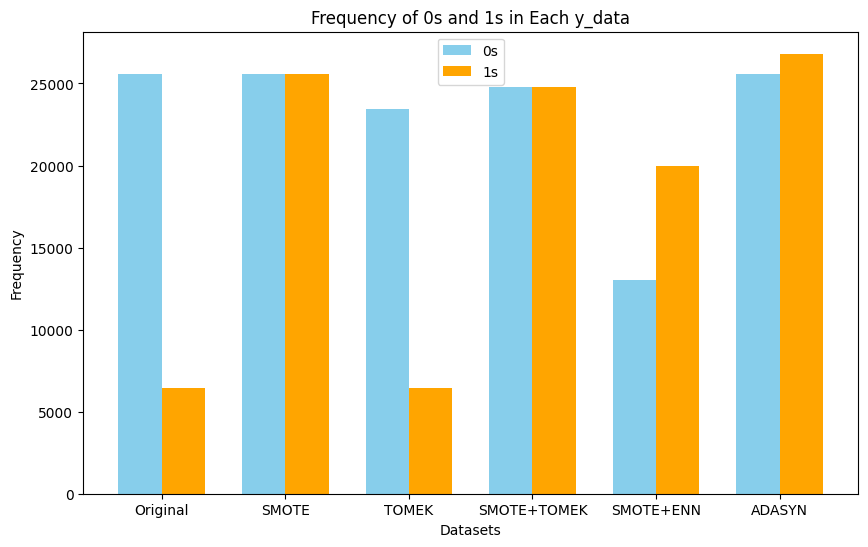

In [93]:
import numpy as np
import matplotlib.pyplot as plt

y_data_list = [y_train,y_resampled_SMOTE,y_tomek,y_resampled_SMOTE_TOMEK,y_resampled_SMOTE_ENN,y_resampled_ADASYN]
custom_labels = ['Original','SMOTE', 'TOMEK', 'SMOTE+TOMEK', 'SMOTE+ENN', 'ADASYN']

frequencies = [np.bincount(y, minlength=2) for y in y_data_list]

frequencies = np.array(frequencies)
x = np.arange(len(y_data_list))

# Plotting
width = 0.35  # Bar width
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for 0s and 1s
bar1 = ax.bar(x - width/2, frequencies[:, 0], width, label='0s', color='skyblue')
bar2 = ax.bar(x + width/2, frequencies[:, 1], width, label='1s', color='orange')

# Add labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of 0s and 1s in Each y_data')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

# Show the plot
plt.show()



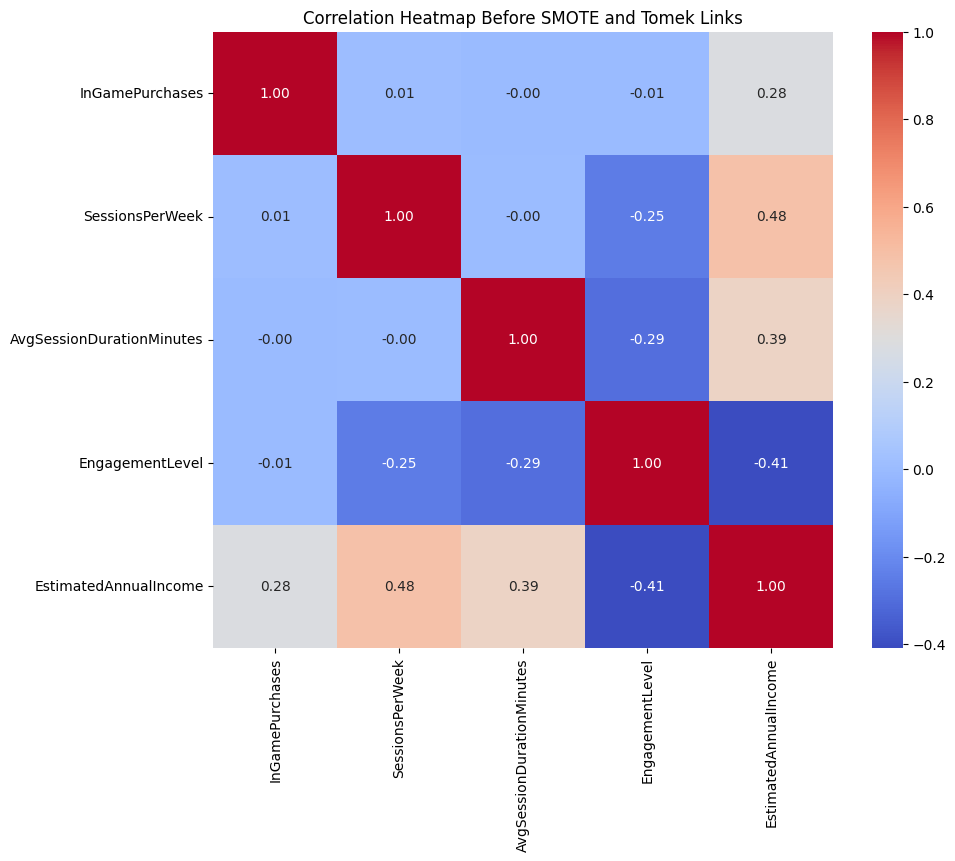

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
x_corr = df.drop(columns = ["PlayerID", "Age", "Gender", "Location", "GameGenre","PlayTimeHours","GameDifficulty","PlayerLevel","AchievementsUnlocked"], axis=1)
y_corr = df['InGamePurchases']

combined_data = x_corr.copy()
combined_data['InGamePurchases'] = y_corr

corr_matrix_before = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_before, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Before SMOTE and Tomek Links')
plt.show()


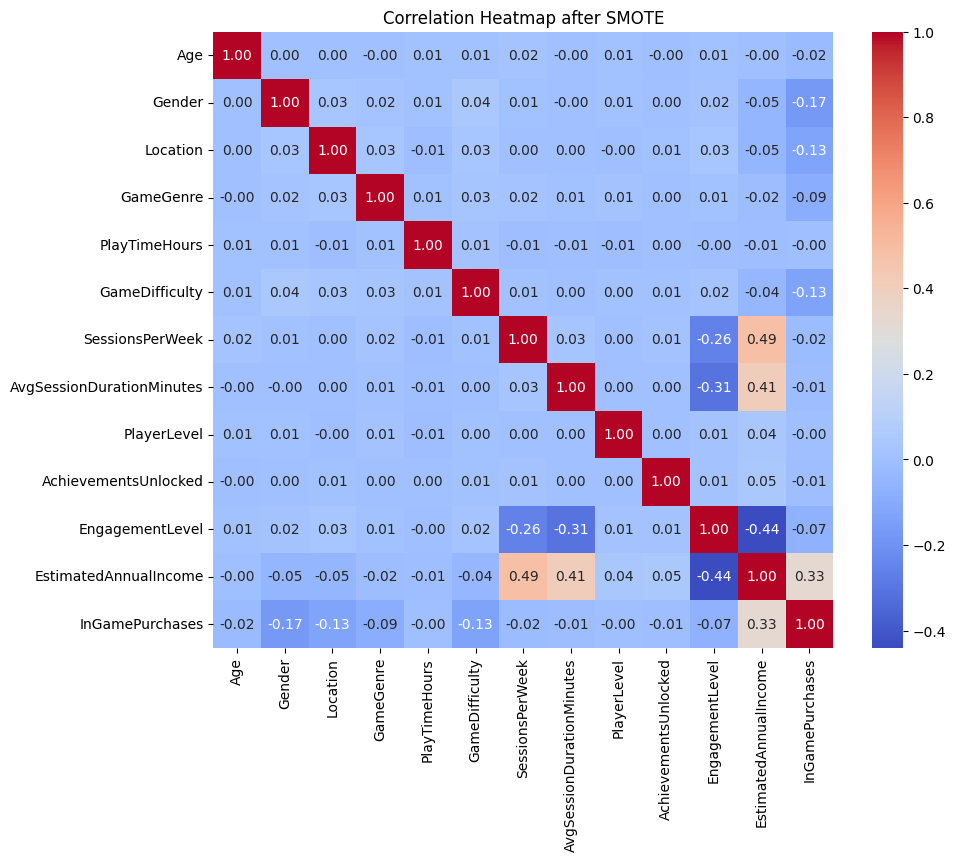

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


resampled_data = pd.DataFrame(X_resampled_SMOTE, columns=X.columns)
resampled_data['InGamePurchases'] = y_resampled_SMOTE

corr_matrix_smote = resampled_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_smote, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after SMOTE')
plt.show()


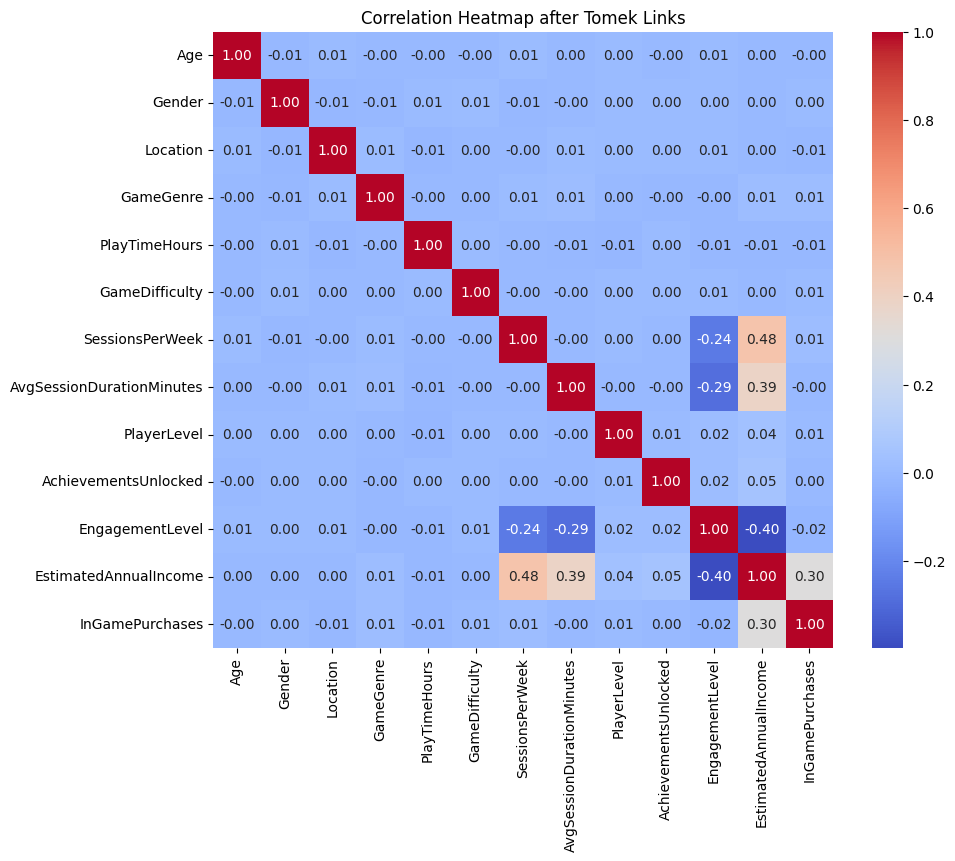

In [96]:


tomek_data = pd.DataFrame(X_tomek, columns=X.columns)
tomek_data['InGamePurchases'] = y_tomek

corr_matrix_tomek = tomek_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tomek, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after Tomek Links')
plt.show()


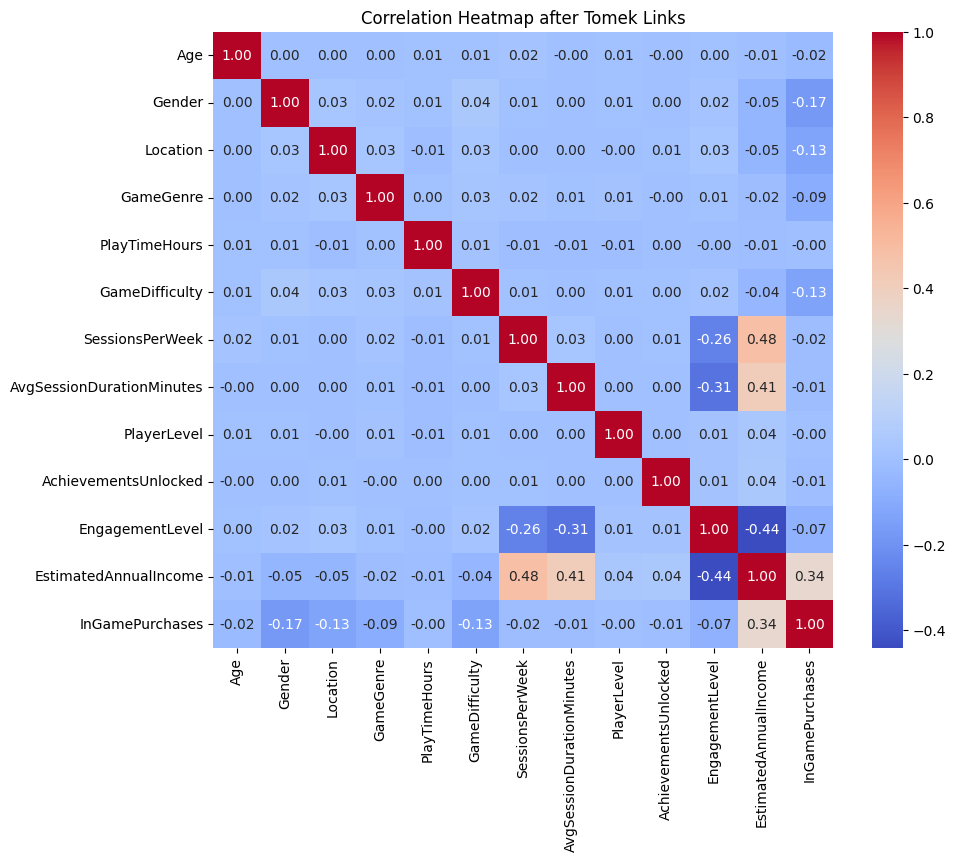

In [97]:
#SMOTE - TOMEK Combination
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SMOTEtomek_data = pd.DataFrame(X_resampled_SMOTE_TOMEK, columns=X.columns)
SMOTEtomek_data['InGamePurchases'] = y_resampled_SMOTE_TOMEK

corr_matrix_SMOTEtomek = SMOTEtomek_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_SMOTEtomek, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after Tomek Links')
plt.show()


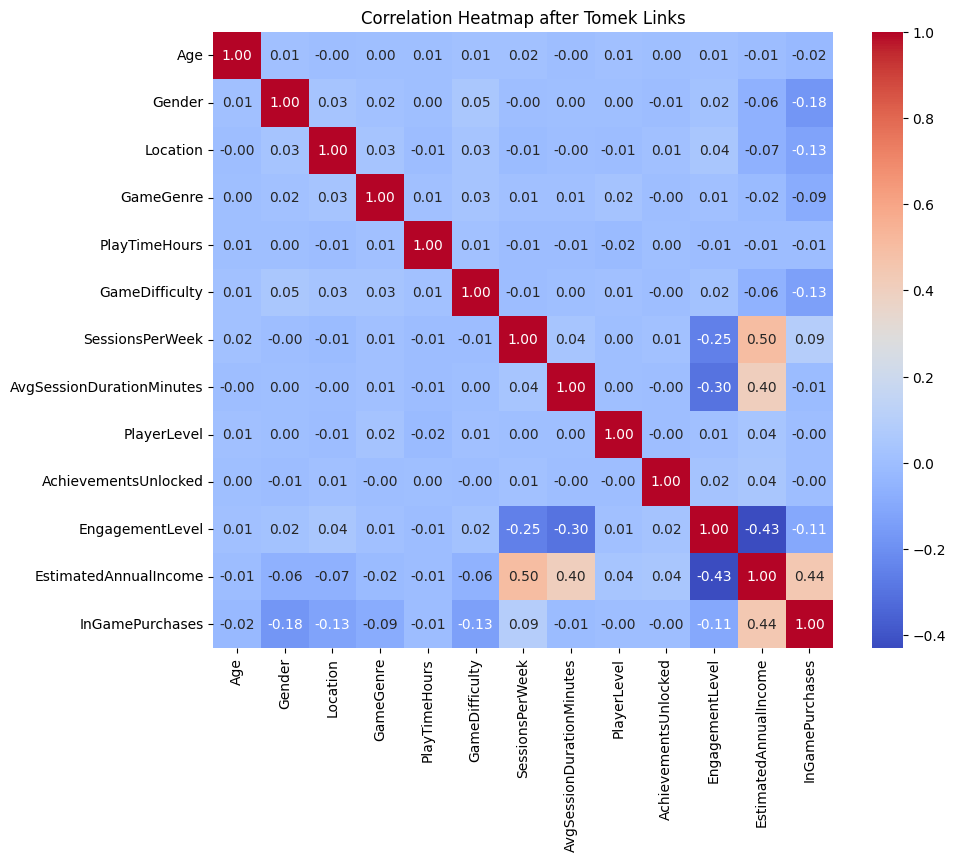

In [98]:
#SMOTEEEN

SMOTEENN_data = pd.DataFrame(X_resampled_SMOTE_ENN, columns=X.columns)
SMOTEENN_data['InGamePurchases'] = y_resampled_SMOTE_ENN

corr_matrix_SMOTEENN = SMOTEENN_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_SMOTEENN, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after Tomek Links')
plt.show()


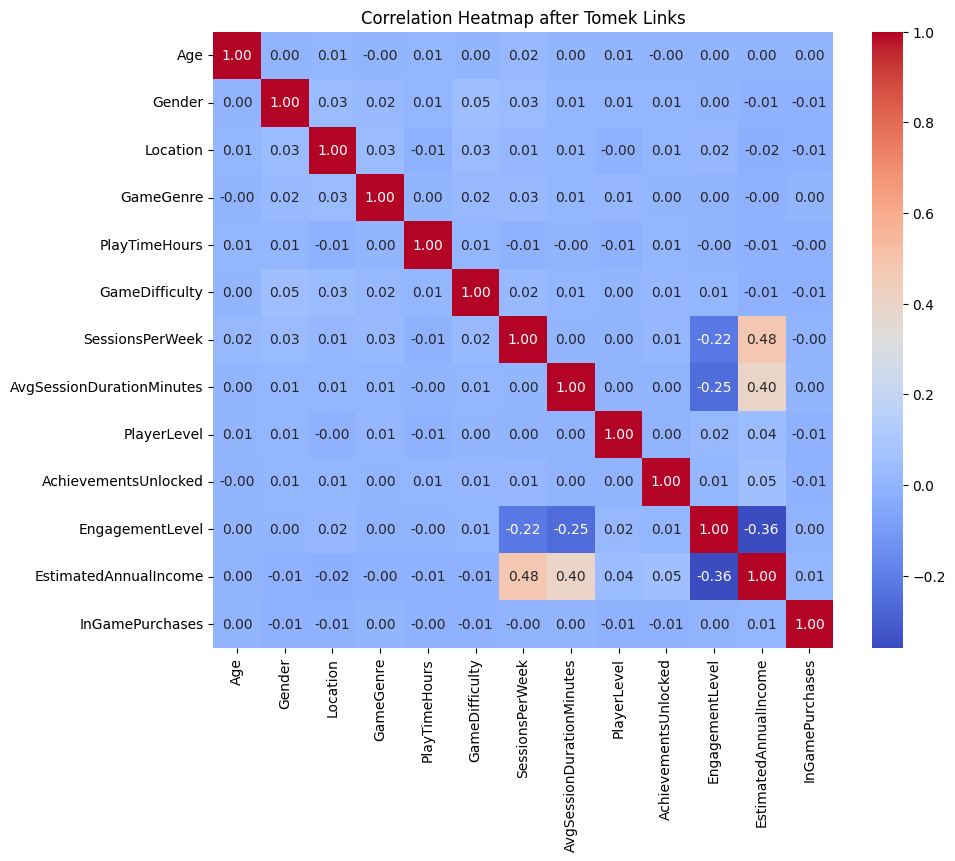

In [99]:
#ADASYN

ADASYN_data = pd.DataFrame(X_resampled_ADASYN, columns=X.columns)
ADASYN_data['InGamePurchases'] = y_resampled_SMOTE_ENN

corr_matrixADASYN =ADASYN_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrixADASYN, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after Tomek Links')
plt.show()


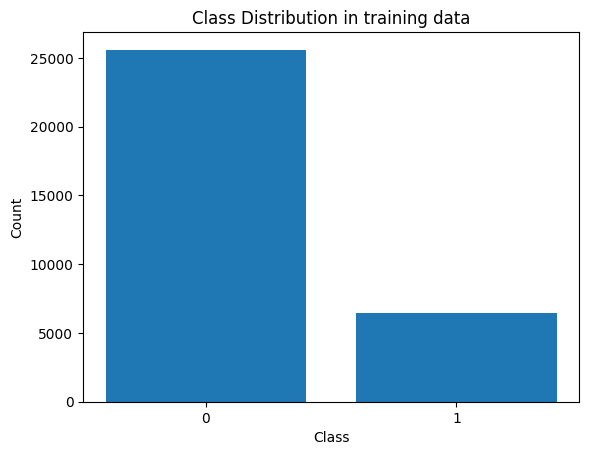

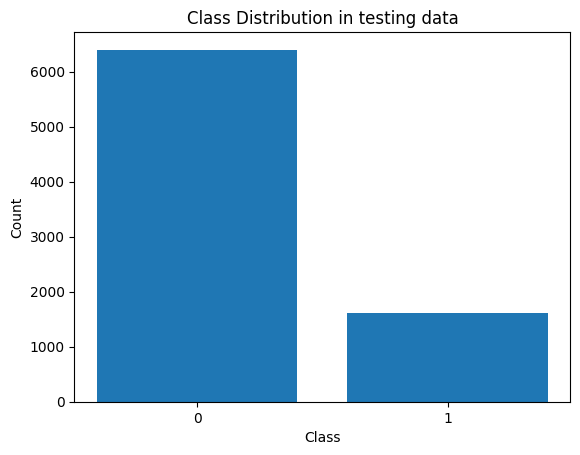

In [100]:
count1= 0
count0 = 0
for i in range(len(y_train)):
  if y_train.values[i] == 1:
    count1 += 1
  else:
    count0 += 1

plt.bar(['0', '1'], [count0, count1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in training data')
plt.show()
count1= 0
count0 = 0

for i in range(len(y_test)):
  if y_test.values[i] == 1:
    count1 += 1
  else:
    count0 += 1

plt.bar(['0', '1'], [count0, count1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in testing data')
plt.show()

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_models(x_train_list, y_train_list, x_test, y_test):
    """
    Trains multiple models on given train datasets and evaluates on test set.

    Parameters:
        x_train_list (list): List of x_train datasets.
        y_train_list (list): List of y_train datasets.
        x_test (array-like): Test features.
        y_test (array-like): Test labels.

    Returns:
        dict: A dictionary containing accuracy, precision, and recall for each model.
    """
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100)
    }

    metrics = {}

    for i, (x_train, y_train) in enumerate(zip(x_train_list, y_train_list), 1):
        print(f"Evaluating on Dataset {i}...")
        metrics[f"Dataset {i}"] = {}

        for model_name, model in models.items():
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
            recall = recall_score(y_test, y_pred, average='binary', pos_label=1)

            metrics[f"Dataset {i}"][model_name] = {
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall
            }

    return metrics

# Example usage:
# x_train_list = [x_train_1, x_train_2, x_train_3, x_train_4, x_train_5]
# y_train_list = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5]
# results = evaluate_models(x_train_list, y_train_list, x_test, y_test)
# print(results)


In [102]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(metrics):
    """
    Plots accuracy, precision, and recall for multiple models and datasets.

    Parameters:
        metrics (dict): A nested dictionary containing model performance metrics for each dataset.
                        Example:
                        {
                            'Dataset 1': {'Logistic Regression': {'Accuracy': 0.85, ...}, ...},
                            ...
                        }
    """
    datasets = list(metrics.keys())
    models = list(metrics[datasets[0]].keys())  # Assume all datasets have the same models

    # Prepare data for each metric
    metrics_names = ["Accuracy", "Precision", "Recall"]
    for metric_name in metrics_names:
        plt.figure(figsize=(12, 6))

        # Extract metric values for each model and dataset
        metric_values = {
            model: [metrics[ds][model][metric_name] for ds in datasets]
            for model in models
        }

        x = np.arange(len(datasets))  # Dataset indices for x-axis

        # Plotting
        bar_width = 0.2  # Bar width for grouped bar chart
        for i, (model, values) in enumerate(metric_values.items()):
            plt.bar(x + i * bar_width, values, bar_width, label=model)

        # Customize the plot
        plt.xlabel('Datasets')
        plt.ylabel(metric_name)
        plt.title(f'Comparison of {metric_name} Across Models and Datasets')
        plt.xticks(x + (bar_width * (len(models) - 1)) / 2, datasets)  # Center x-ticks
        plt.legend()

        # Show the plot
        plt.show()

# Example usage (Assuming `results` is the dictionary returned by evaluate_models):
# plot_metrics(results)


In [103]:
x_train_list = [X_train,X_resampled_SMOTE,X_tomek,X_resampled_SMOTE_TOMEK,X_resampled_SMOTE_ENN,X_resampled_ADASYN]
y_train_list = [y_train,y_resampled_SMOTE,y_tomek,y_resampled_SMOTE_TOMEK,y_resampled_SMOTE_ENN,y_resampled_ADASYN]

In [104]:
metrics = evaluate_models(x_train_list, y_train_list, X_test, y_test)


Evaluating on Dataset 1...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating on Dataset 2...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating on Dataset 3...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating on Dataset 4...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating on Dataset 5...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating on Dataset 6...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


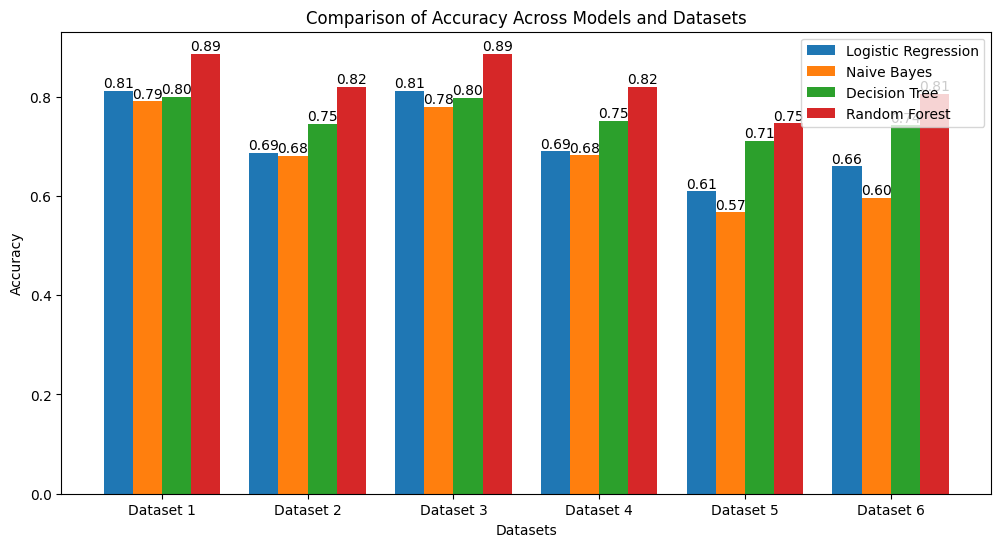

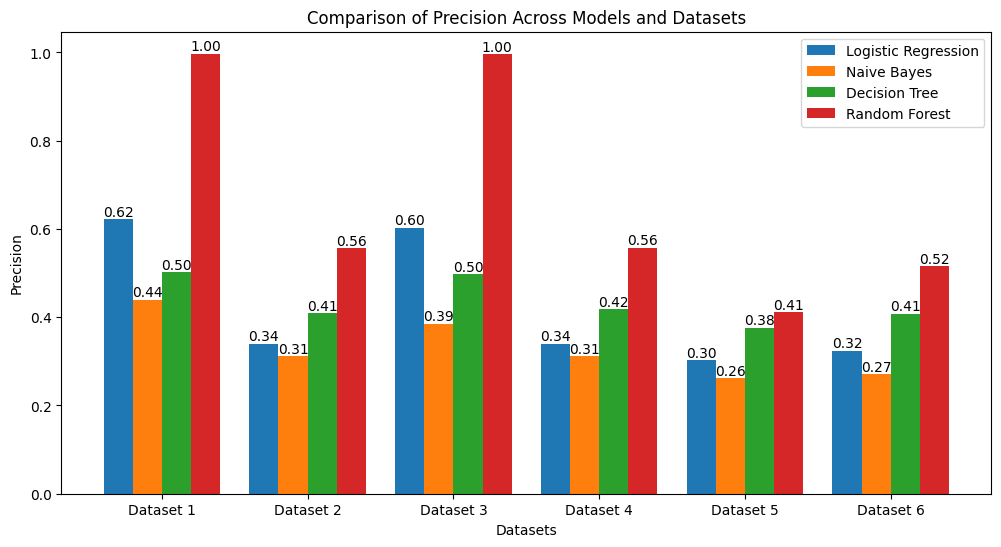

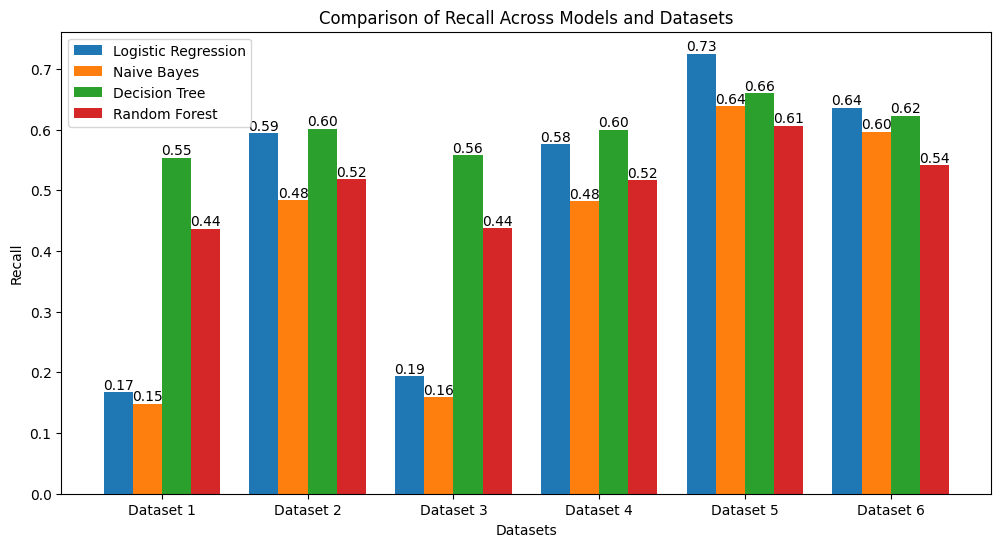

In [105]:
custom_labels = ['Original','SMOTE', 'TOMEK', 'SMOTE+TOMEK', 'SMOTE+ENN', 'ADASYN']

plot_metrics(metrics)


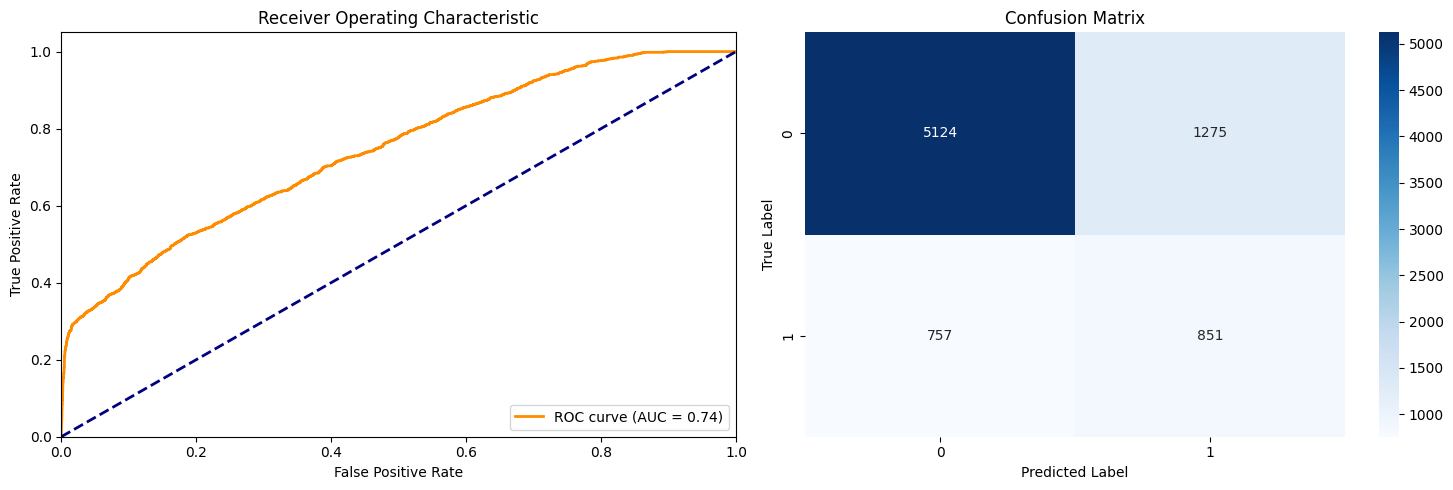


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6399
           1       0.40      0.53      0.46      1608

    accuracy                           0.75      8007
   macro avg       0.64      0.66      0.65      8007
weighted avg       0.78      0.75      0.76      8007


Class distribution in original training data:
InGamePurchases
0    0.5
1    0.5
Name: proportion, dtype: float64


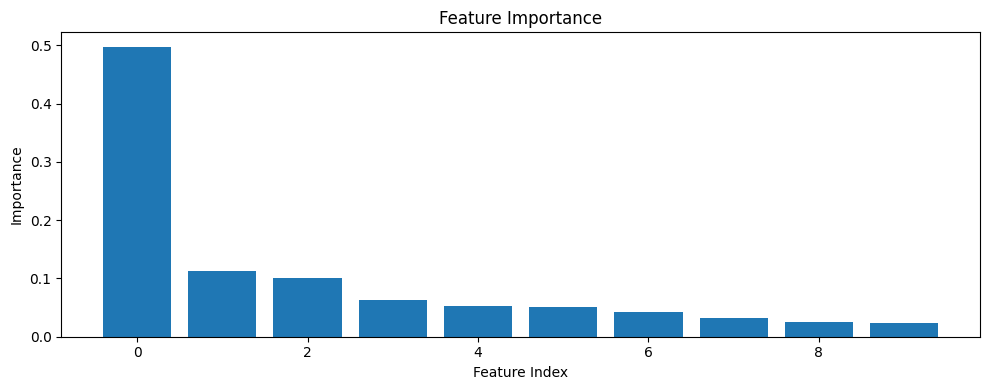

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

def train_rf_with_smote(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    rf_model = RandomForestClassifier(
       criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42,n_estimators=100
    )
    rf_model.fit(X_train_resampled, y_train_resampled)

    return rf_model, X_test, y_test, X_train_resampled, y_train_resampled

def plot_evaluation_metrics(model, X_test, y_test, X_train_resampled, y_train_resampled):

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nClass distribution in original training data:")
    print(pd.Series(y_train_resampled).value_counts(normalize=True))

    feature_importance = pd.DataFrame({
        'feature': range(X_train_resampled.shape[1]),
        'importance': model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 4))
    plt.bar(range(len(feature_importance)), feature_importance['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

X = df.drop(columns=['PlayerID', 'InGamePurchases','Location','EngagementLevel'],axis = 1)
y = df['InGamePurchases']
rf_model, X_test, y_test, X_train_resampled, y_train_resampled = train_rf_with_smote(X, y)
plot_evaluation_metrics(rf_model, X_test, y_test, X_train_resampled, y_train_resampled)